In [1]:
import numpy as np
import pandas as pd

C:\Users\SiFuBrO\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SiFuBrO\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\SiFuBrO\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
##https://math.stackexchange.com/questions/906240/algorithms-to-increase-or-decrease-the-contrast-of-an-image

# `BRIGHTENESS & CONTRAST`

## `SIMPLE LINEAR POINT-WISE TRANSFORMATION`

### The basic contrast and brightness adjustments are transformations of the form
## $$ f(x) = a * x + b$$

### a controls contrast (a>1 more and 0<a<1 less)
### x is the color (either R G or B)

## For easier separation of "brightness" and "contrast" modifications, the formula can be written like

## $$ f(x) = a * (x - 128) + 128 + b$$

In [ ]:
More complex contrast adjustments can be done using a arbitrary "curves" f:[0,255]→[0,255], which are be provided by the user of the image processing software using graphical tools, see e.g.

# `BRIGHTNESS`

#### `Brightness is a relative term defined as the intensity of a pixel relative to another pixel.`

### Changing Brightness

- To change the brightness of an image we need to first load an image, then change all the pixel values.
- To increase the brightness we need to increase the intensity of each pixel by a constant and similarly to darken the image we need to decrease the intensity of every pixel of the image (https://ie.nitk.ac.in/blog/2020/01/19/algorithms-for-adjusting-brightness-and-contrast-of-an-image/).

# `Contrast`

#### `Contrast = maximum pixel intensity - minimum pixel intensity`  

- To change the contrast of an image we just need to change the value of the max and min intensity pixel.
But if we are just changing the value of two pixels there won’t be any difference in the two images. But if we are just changing the value of two pixels there won’t be any difference in the two images

In [ ]:
#https://docs.opencv.org/2.4/doc/tutorials/core/basic_linear_transform/basic_linear_transform.html

In [ ]:
#https://www.dfstudios.co.uk/articles/programming/image-programming-algorithms/image-processing-algorithms-part-5-contrast-adjustment/

In [ ]:
#https://ie.nitk.ac.in/blog/2020/01/19/algorithms-for-adjusting-brightness-and-contrast-of-an-image/

#### Changing contrast

- So the first step is to calculate a contrast correction factor which is given by the following formula:
$$ F = 259*(255+C)/255*(259-C) $$

- In order for the algorithm to function correctly the value for the contrast correction factor (F) needs to be stored as a floating point number and not as an integer. The value C in the formula denotes the desired level of contrast.
- The adjustment for red-green-blue colours are as below
$$ R’ = F(R-128) +128 $$
$$ G’ = F(G-128) +128 $$
$$ B’ = F(B-128) +128 $$
- Finally clip the values between 0 and 255

## LUMINANCE

In [ ]:
#https://pillow.readthedocs.io/en/stable/reference/Image.html
#https://pillow.readthedocs.io/en/stable/_modules/PIL/Image.html#Image.convert

L = R * 299/1000 + G * 587/1000 + B * 114/1000

In [ ]:
#https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color


In [ ]:
#https://www.mathworks.com/matlabcentral/answers/99136-how-do-i-convert-my-rgb-image-to-grayscale-without-using-the-image-processing-toolbox

# effective luminance of a pixel
intensity = 0.2989*red + 0.5870*green + 0.1140*blue
gray = 0.2989 * rgb(:,:,1) + 0.5870 * rgb(:,:,2) + 0.1140 * rgb(:,:,3)

In [ ]:
def rgbLuminance(r, g, b):
    luminanceR = 0.22248840
    luminanceG = 0.71690369
    luminanceB = 0.06060791
    return (r * luminanceR) + (g * luminanceG) + (b * luminanceB)

# `HUE`

### RGB to HSV conversion formula

- The R,G,B values are divided by 255 to change the range from 0..255 to 0..1:

    - R' = R/255
    - G' = G/255
    - B' = B/255

- Find max and min of color + delta
    - Cmax = max(R', G', B')
    - Cmin = min(R', G', B')
    - Δ = Cmax - Cmin

### Hue calculation:

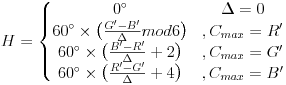

### Saturation calculation:

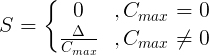

### Value calculation:
### $$ V = Cmax $$

In [ ]:
### https://www.had2know.org/technology/hsv-rgb-conversion-formula-calculator.html#:~:text=Converting%20RGB%20to%20HSV&text=H%20%3D%20360%20%2D%20cos%2D1,cosine%20is%20calculated%20in%20degrees.

In [2]:
import numpy as np

def rgb2hsv(rgb):
    """ convert RGB to HSV color space

    :param rgb: np.ndarray
    :return: np.ndarray
    """

    rgb = rgb.astype('float')
    maxv = np.amax(rgb, axis=2)
    maxc = np.argmax(rgb, axis=2)
    minv = np.amin(rgb, axis=2)
    minc = np.argmin(rgb, axis=2)

    hsv = np.zeros(rgb.shape, dtype='float')
    hsv[maxc == minc, 0] = np.zeros(hsv[maxc == minc, 0].shape)
    hsv[maxc == 0, 0] = (((rgb[..., 1] - rgb[..., 2]) * 60.0 / (maxv - minv + np.spacing(1))) % 360.0)[maxc == 0]
    hsv[maxc == 1, 0] = (((rgb[..., 2] - rgb[..., 0]) * 60.0 / (maxv - minv + np.spacing(1))) + 120.0)[maxc == 1]
    hsv[maxc == 2, 0] = (((rgb[..., 0] - rgb[..., 1]) * 60.0 / (maxv - minv + np.spacing(1))) + 240.0)[maxc == 2]
    hsv[maxv == 0, 1] = np.zeros(hsv[maxv == 0, 1].shape)
    hsv[maxv != 0, 1] = (1 - minv / (maxv + np.spacing(1)))[maxv != 0]
    hsv[..., 2] = maxv

    return hsv

def hsv2rgb(hsv):
    """ convert HSV to RGB color space

    :param hsv: np.ndarray
    :return: np.ndarray
    """

    hi = np.floor(hsv[..., 0] / 60.0) % 6
    hi = hi.astype('uint8')
    v = hsv[..., 2].astype('float')
    f = (hsv[..., 0] / 60.0) - np.floor(hsv[..., 0] / 60.0)
    p = v * (1.0 - hsv[..., 1])
    q = v * (1.0 - (f * hsv[..., 1]))
    t = v * (1.0 - ((1.0 - f) * hsv[..., 1]))

    rgb = np.zeros(hsv.shape)
    rgb[hi == 0, :] = np.dstack((v, t, p))[hi == 0, :]
    rgb[hi == 1, :] = np.dstack((q, v, p))[hi == 1, :]
    rgb[hi == 2, :] = np.dstack((p, v, t))[hi == 2, :]
    rgb[hi == 3, :] = np.dstack((p, q, v))[hi == 3, :]
    rgb[hi == 4, :] = np.dstack((t, p, v))[hi == 4, :]
    rgb[hi == 5, :] = np.dstack((v, p, q))[hi == 5, :]

    return rgb

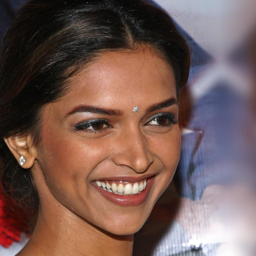

In [15]:
from pathlib import Path
from PIL import Image

path = 'D://DATASETS/celeba_hq/val/female/000168.jpg'
img = Image.open(path).resize((256,256))
img

In [16]:
# def rgb2hsv_pil(image):
#     return image.convert('HSV')

# rgb2hsv_pil(img)

In [17]:
import cv2

# Read the image - Notice that OpenCV reads the images as BRG instead of RGB
img = cv2.imread(path)

# Convert the BRG image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the RGB image to HSV
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img

array([[[115,  59,  26],
        [115,  59,  26],
        [115,  57,  27],
        ...,
        [174,  32, 151],
        [174,  32, 151],
        [174,  32, 151]],

       [[115,  61,  25],
        [115,  59,  26],
        [115,  57,  27],
        ...,
        [174,  32, 151],
        [174,  32, 151],
        [174,  32, 151]],

       [[115,  61,  25],
        [115,  61,  25],
        [115,  59,  26],
        ...,
        [174,  32, 151],
        [174,  32, 151],
        [174,  32, 151]],

       ...,

       [[111,  24, 210],
        [111,  24, 210],
        [111,  24, 210],
        ...,
        [158,  17, 166],
        [158,  17, 165],
        [158,  17, 164]],

       [[111,  24, 209],
        [111,  24, 209],
        [111,  24, 210],
        ...,
        [158,  17, 167],
        [158,  17, 165],
        [158,  17, 165]],

       [[111,  25, 208],
        [111,  25, 208],
        [111,  25, 208],
        ...,
        [158,  17, 167],
        [158,  17, 166],
        [158,  17, 165]]

In [18]:
# Read the image - Notice that OpenCV reads the images as BRG instead of RGB
img = cv2.imread(path)

# Convert the BRG image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#custom
img2 = rgb2hsv(img)
img2

array([[[2.30000000e+02, 2.30769231e-01, 2.60000000e+01],
        [2.30000000e+02, 2.30769231e-01, 2.60000000e+01],
        [2.30000000e+02, 2.22222222e-01, 2.70000000e+01],
        ...,
        [3.47368421e+02, 1.25827815e-01, 1.51000000e+02],
        [3.47368421e+02, 1.25827815e-01, 1.51000000e+02],
        [3.47368421e+02, 1.25827815e-01, 1.51000000e+02]],

       [[2.30000000e+02, 2.40000000e-01, 2.50000000e+01],
        [2.30000000e+02, 2.30769231e-01, 2.60000000e+01],
        [2.30000000e+02, 2.22222222e-01, 2.70000000e+01],
        ...,
        [3.47368421e+02, 1.25827815e-01, 1.51000000e+02],
        [3.47368421e+02, 1.25827815e-01, 1.51000000e+02],
        [3.47368421e+02, 1.25827815e-01, 1.51000000e+02]],

       [[2.30000000e+02, 2.40000000e-01, 2.50000000e+01],
        [2.30000000e+02, 2.40000000e-01, 2.50000000e+01],
        [2.30000000e+02, 2.30769231e-01, 2.60000000e+01],
        ...,
        [3.47368421e+02, 1.25827815e-01, 1.51000000e+02],
        [3.47368421e+02, 1.25

In [20]:
from skimage.color import rgb2hsv as rgb2hsv_skimage
# Read the image - Notice that OpenCV reads the images as BRG instead of RGB
img = cv2.imread(path)

# Convert the BRG image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv_img = rgb2hsv_skimage(img)
hsv_img*255

array([[[162.91666667,  58.84615385,  26.        ],
        [162.91666667,  58.84615385,  26.        ],
        [162.91666667,  56.66666667,  27.        ],
        ...,
        [246.05263158,  32.08609272, 151.        ],
        [246.05263158,  32.08609272, 151.        ],
        [246.05263158,  32.08609272, 151.        ]],

       [[162.91666667,  61.2       ,  25.        ],
        [162.91666667,  58.84615385,  26.        ],
        [162.91666667,  56.66666667,  27.        ],
        ...,
        [246.05263158,  32.08609272, 151.        ],
        [246.05263158,  32.08609272, 151.        ],
        [246.05263158,  32.08609272, 151.        ]],

       [[162.91666667,  61.2       ,  25.        ],
        [162.91666667,  61.2       ,  25.        ],
        [162.91666667,  58.84615385,  26.        ],
        ...,
        [246.05263158,  32.08609272, 151.        ],
        [246.05263158,  32.08609272, 151.        ],
        [246.05263158,  32.08609272, 151.        ]],

       ...,

      

In [26]:
import colorsys
colorsys.rgb_to_hsv(.3, .4, .2)

(0.25, 0.5, 0.4)

In [34]:
def rgb_to_hsv(r, g, b):
    if r>1:
        r /=255
    if g>1:
        g /= 255
    if b>1:
        b /= 255
    
    maxc = max(r, g, b)
    minc = min(r, g, b)
    v = maxc
    if minc == maxc:
        return 0.0, 0.0, v
    s = (maxc-minc) / maxc
    rc = (maxc-r) / (maxc-minc)
    gc = (maxc-g) / (maxc-minc)
    bc = (maxc-b) / (maxc-minc)
    if r == maxc:
        h = bc-gc
    elif g == maxc:
        h = 2.0+rc-bc
    else:
        h = 4.0+gc-rc
    h = (h/6.0) % 1.0
    return h, s, v

In [35]:
rgb_to_hsv(.3, .4, .2)

(0.25, 0.5, 0.4)

In [37]:
rgb_to_hsv(76.5, 102.0, 51.0)

(0.25, 0.5, 0.4)

In [32]:
def hsv_to_rgb(h, s, v):
    if s == 0.0:
        return v, v, v
    i = int(h*6.0) # XXX assume int() truncates!
    f = (h*6.0) - i
    p = v*(1.0 - s)
    q = v*(1.0 - s*f)
    t = v*(1.0 - s*(1.0-f))
    i = i%6
    if i == 0:
        return v, t, p
    if i == 1:
        return q, v, p
    if i == 2:
        return p, v, t
    if i == 3:
        return p, q, v
    if i == 4:
        return t, p, v
    if i == 5:
        return v, p, q
    # Cannot get here

In [33]:
hsv_to_rgb(0.25, 0.5, 0.4)

(0.30000000000000004, 0.4, 0.2)

## https://stackoverflow.com/questions/27041559/rgb-to-hsv-python-change-hue-continuously

In [ ]:
import os
import colorsys
import Image

def hueChange(img, hue):
    # It's better to raise an exception than silently return None if img is not
    # an Image.
    img.load()
    r, g, b = img.split()
    r_data = []
    g_data = []
    b_data = []

    for rd, gr, bl in zip(r.getdata(), g.getdata(), b.getdata()):
        h, s, v = colorsys.rgb_to_hsv(rd / 255., bl / 255., gr / 255.) 
        rgb = colorsys.hsv_to_rgb(hue/360., s, v)
        rd, gr, bl = [int(x*255.) for x in rgb]
        r_data.append(rd)
        g_data.append(gr)
        b_data.append(bl)

    r.putdata(r_data)
    g.putdata(g_data)
    b.putdata(b_data)
    return Image.merge('RGB',(r,g,b))

filename = 'image.png'
basename, ext = os.path.splitext(filename)
img = Image.open(filename).convert('RGB')
for hue in range(1, 360, 30):
    img2 = hueChange(img, hue)
    out_name = '{}_hue{:03d}.jpg'.format(basename, hue)
    img2.save(out_name)

Changing the values pixel by pixel can be very slow for large images. For better performance, use NumPy. (The NumPy functions were taken from here) (https://stackoverflow.com/questions/7274221/changing-image-hue-with-python-pil/7274986#7274986)

In [ ]:
import os
import Image
import numpy as np

def rgb_to_hsv(rgb):
    # Translated from source of colorsys.rgb_to_hsv
    # r,g,b should be a numpy arrays with values between 0 and 255
    # rgb_to_hsv returns an array of floats between 0.0 and 1.0.
    rgb = rgb.astype('float')
    hsv = np.zeros_like(rgb)
    # in case an RGBA array was passed, just copy the A channel
    hsv[..., 3:] = rgb[..., 3:]
    r, g, b = rgb[..., 0], rgb[..., 1], rgb[..., 2]
    maxc = np.max(rgb[..., :3], axis=-1)
    minc = np.min(rgb[..., :3], axis=-1)
    hsv[..., 2] = maxc
    mask = maxc != minc
    hsv[mask, 1] = (maxc - minc)[mask] / maxc[mask]
    rc = np.zeros_like(r)
    gc = np.zeros_like(g)
    bc = np.zeros_like(b)
    rc[mask] = (maxc - r)[mask] / (maxc - minc)[mask]
    gc[mask] = (maxc - g)[mask] / (maxc - minc)[mask]
    bc[mask] = (maxc - b)[mask] / (maxc - minc)[mask]
    hsv[..., 0] = np.select(
        [r == maxc, g == maxc], [bc - gc, 2.0 + rc - bc], default=4.0 + gc - rc)
    hsv[..., 0] = (hsv[..., 0] / 6.0) % 1.0
    return hsv

def hsv_to_rgb(hsv):
    # Translated from source of colorsys.hsv_to_rgb
    # h,s should be a numpy arrays with values between 0.0 and 1.0
    # v should be a numpy array with values between 0.0 and 255.0
    # hsv_to_rgb returns an array of uints between 0 and 255.
    rgb = np.empty_like(hsv)
    rgb[..., 3:] = hsv[..., 3:]
    h, s, v = hsv[..., 0], hsv[..., 1], hsv[..., 2]
    i = (h * 6.0).astype('uint8')
    f = (h * 6.0) - i
    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))
    i = i % 6
    conditions = [s == 0.0, i == 1, i == 2, i == 3, i == 4, i == 5]
    rgb[..., 0] = np.select(conditions, [v, q, p, p, t, v], default=v)
    rgb[..., 1] = np.select(conditions, [v, v, v, q, p, p], default=t)
    rgb[..., 2] = np.select(conditions, [v, p, t, v, v, q], default=p)
    return rgb.astype('uint8')

def hueChange(img, hue):
    arr = np.array(img)
    hsv = rgb_to_hsv(arr)
    hsv[..., 0] = hue
    rgb = hsv_to_rgb(hsv)
    return Image.fromarray(rgb, 'RGB')

filename = 'image.png'
basename, ext = os.path.splitext(filename)
img = Image.open(filename).convert('RGB')
for hue in np.linspace(0, 360, 8):
    img2 = hueChange(img, hue/360.)
    out_name = '{}_hue{:03d}.jpg'.format(basename, int(hue))
    img2.save(out_name)

According to this page (https://clearps.com/photoshop-discussions/threads/17204-what-does-the-colorize-button-actually-do/), when the Photoshop "Colorize" box is unchecked, the hue of each pixel is shifted by the same amount. When the "Colorize" box is checked, the hue of each pixel is set to the same amount.

So, to shift the hue by a fixed amount, use:

In [ ]:
def hueShift(img, amount):
    arr = np.array(img)
    hsv = rgb_to_hsv(arr)
    hsv[..., 0] = (hsv[..., 0]+amount) % 1.0
    rgb = hsv_to_rgb(hsv)
    return Image.fromarray(rgb, 'RGB')

filename = 'without_colorize.jpg'
basename, ext = os.path.splitext(filename)
img = Image.open(filename).convert('RGB')
for amount in (50, 133):
    img2 = hueShift(img, amount/360.)
    out_name = '{}_hue{:+03d}.jpg'.format(basename, int(amount))
    img2.save(out_name)

In [ ]:
# https://stackoverflow.com/questions/23090019/fastest-formula-to-get-hue-from-rgb#:~:text=Find%20the%20minimum%20and%20maximum%20values%20of%20R%2C%20G%20and%20B.&text=If%20Red%20is%20max%2C%20then,(R%2DG)%2F(max%2Dmin)
# https://www.niwa.nu/2013/05/math-behind-colorspace-conversions-rgb-hsl/
#http://changingminds.org/explanations/perception/visual/hsl.htm#:~:text=Calculate%20the%20Luminosity%20as%20(max,(2%20%2D%20max%20%2D%20min)

- Indicates the dominant wavelenght in a mixture of light waves
- 
- 
- 

## Get Hue from RGB
- Convert the RGB values to the range 0-1, this can be done by dividing the value by 255 for 8-bit color depth (r,g,b - are given values): 
    - R = r/255
    - G = g/255
    - B = b/255
- Find the minimum and maximum values of R, G and B.
    - max = max(R,G,B)
    - min = min(R,G,B)
- if max=min the hue=0
- Depending on what RGB color channel is the max value. The three different formulas are
    - If Red is the max (red is the predominant colour), then Hue = (G-B)/(max-min)
    - If Green is max (green is the predominant colour), then Hue = 2.0 + (B-R)/(max-min)
    - If Blue is max (blue is the predominant colour), then Hue = 4.0 + (R-G)/(max-min)
- The Hue value you get needs to be multiplied by 60 to convert it to degrees on the color circle. If Hue becomes negative you need to add 360 to, because a circle has 360 degrees.

In [ ]:
def get_hue(img):
    
    R = img[0,:,:]
    G = img[1,,:,:]

In [ ]:
### Change Hue as follows:



# `SATURATION`

- Refers to the relative purity or the amount of white light mixed with its hue
- Red is fully saturated (and G and B). Pink, which is Red with white light is less saturated. As you add light you obtain less saturation
- 
- 

# `TEMPERATURE NORMALIZATION - WHITE BALANCING - COLOR BALANCING - kelvin color temperature in python`

## Erlend

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

C:\Users\SiFuBrO\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SiFuBrO\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\SiFuBrO\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\SiFuBrO\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
from temp_table import ktable

In [ ]:
class TempNormTool():
    
    def __init__(self):
        """
        Temp tool to estimate and change RGB image temperature
        
        Methods:
        --------
        1. `get_temperature`: estimates the current temperature of an image:
            parameters:
                - img: tf.tensor([h,w,3], tf.float32) --> Input Image
            returns:
                - temp_estimate: tf.tensor([1], tf.int32) --> Temperature Estimation in Kelvin
        
        2. `convert_temperature`: to change the temperature of an image
            parameters:
                - img: tf.tensor([h,w,3], tf.float32) --> Input Image
            returns:
                - temp_image: tf.tensor([h,w,3], tf.float32) --> Input image at *new* temperature
                
        Theory:
        -------
        A. Temperature Estimation is done by:
            1. Find the white-point of the input image (brightest pixel)
            2. Find the closest (Sum MAE) RGB value in the temperature table
            3. Take temperature of closest RGB to white-point
            
        B. Temperature conversion is done by:
            1. Find the white-point of the input image (brightest pixel)
            2. Look-up RGB value of requested temperature
            3. Scale this RGB value by the white-point RGB values
            4. Apply this weight to the input img RGB channels
        """
        self.ktable = self.create_kelvin_table()
        
    #########################################
    ###  A. ESTIMATING IMAGE TEMPERATURE  ###
    #########################################
    
    @tf.function
    def get_temperature(self, img):
        """Estimates the current temperature of an image using pixel with maximum brightness"""
        # img is [h,w,3] tensor
        
        #Ensure RGB or RGBA float32 tensor - alpha channel is dropped
        assert ((tf.is_tensor(img)) & (len(img.shape) ==3) & (img.shape[-1] in [3,4])), "input should be 4 channel RGB float32 tensor"
        
        img = tf.cast(img[:, :, :3], dtype=tf.float32)
        
        #Get brightess pixel location and its RGB value
        white_point, white_point_idx = self.get_white_point(img)
        
        # lookup the temperature value from RGB table
        # converts RGB values to Kelvin
        temp_estimate = self.estimate_temperature_from_white_point(white_point)
        
        return temp_estimate
    
    
    @tf.function
    def get_brightness_image(self, img):
        """Returns the brightness of each pixel in the given image"""
        # img is [h,w,3] tensor
        
        # To compute brightness of an image do a weighted average across channels
        brightness_image = tf.convert_to_tensor([0.2126*img[:,:,0] + 0.7152*img[:,:,1] + 0.0722*img[:,:,2]], dtype=tf.float32)
        # brightness_image will be a [1,h,w] tensor
    
        return brightness_image 
    
    
    @tf.function
    def get_white_point(self, img):
        """Returns white point and its coordinates"""
        # img is a [h,w,3] tensor 
        brightness_image = self.get_brightness_image(img) 
        #brightness_image is [1,h,w] tensor
        
        # get the maximum pixel (from all channels collectively)
        # brightness_image[0] is [h,w] tensor
        brightness_argmax = tf.argmax(tf.reshape(brightness_image[0], [-1]), axis=None) #brightness_argmax is () location
        
        brightness_argmax = brightness_argmax // brightness_image[0].shape[1], \
                            brightness_argmax % brightness_image[0].shape[1],
        # brightness_argmax is tuple of height and width of argmax
        
        # white_point = [y,x,:]  3-D array of (R,G,B) channel values of highest brightness, where
        # brightness(y,x) = 0.2126*img[y,x,0] + 0.7152*img[y,x,1] + 0.0722*img[y,x,2] 
        white_point = tf.gather_nd(img, brightness_argmax)
        
        return white_point, brightness_argmax
        
         
    @tf.function  
    def estimate_temperature_from_white_point(self, rgb_values_of_white_point):
        """Find the temperature that most closely match the given rgb_values of white point"""
        assert (len(rgb_values_of_white_point)==3), f"rgb values of white point should be length 2: [R,G,B], got {rgb_values_of_white_point}"
        
        rgb_values_of_white_point = tf.cast(rgb_values_of_white_point, dtype=tf.float32)
        # find the distances od white point from rgb_points of the temperature table
        maes = tf.reduce_sum(tf.abs(self.ktable - rgb_values_of_white_point), axis=1)
        min_arg = tf.argmin(maes)
        # temp_estimate = (min_arg + (1000//100)) * 100
        temp_estimate = (min_arg + 10) * 100
        return temp_estimate
    
    
    #########################################
    ###  B. CONVERTING IMAGE TEMPERATURE  ###
    #########################################
    
    @tf.function
    def get_multiplier(self, temperature):
        """For a given temperature, return RGB values of the white-point"""
        temperature = tf.clip_by_value(temperature, 1000, 40000)
        
        #ktable_idx = temperature / 100 - (1000//100)
        #get index from temp table
        # e.g. if temperature = 5670 then 
        # ktable_idx=46.7   --->   floor = 46 and ceil = 47
        # interpolation_factors = [0.70000076, 0.70000076, 0.70000076]
        ktable_idx = temperature / 100 - 10 
        ktable_idx_floored = tf.math.floor(ktable_idx)
        ktable_idx_ceiled = tf.math.ceil(ktable_idx)
        interpolation_factors = tf.repeat(tf.expand_dims(ktable_idx, -1), 3) - ktable_idx_floored
        
        # Do a interpolation between the 2 retrieved ktable values 
        multiplier_floored = self.ktable[tf.cast(ktable_idx_floored, dtype=tf.int32), :]
        multiplier_ceiled = self.ktable[tf.cast(ktable_idx_ceiled, dtype=tf.int32), :]
        # e.g. multiplier_floored = [255, 238, 227]
        # e.g. multiplier_ceiled = [255, 239, 230]
        
        multiplier = multiplier_floored + interpolation_factors * (multiplier_ceiled - multiplier_floored)
        # e.g multiplier = [255. , 238.7, 229.1]
        
        return multiplier 
    
    @tf.function
    def convert_temperature(self, img, target_temp):
        """After estimate white point of img as the pixel with maximum brightness cast the image to another temp and return"""
        # img is [h,w,3] tensor
        
        #Ensure RGB or RGBA float32 tensor - alpha channel is dropped
        assert ((tf.is_tensor(img)) & (len(img.shape) ==3) & (img.shape[-1] in [3,4])), "input should be 4 channel RGB float32 tensor"
        
        img = tf.cast(img[:, :, :3], dtype=tf.float32)
        
        #Get brightess pixel location and its RGB value
        white_point, white_point_idx = self.get_white_point(img) # e.g. white_point = [248, 255, 234]
        
        #
        rgb_scale = self.get_multiplier(target_temp) # e.g. [255. , 238.7, 229.1]
        
        
        # how much to scale the values of R, G and B channels
        matrix = tf.convert_to_tensor([
            [rgb_scale[0]/white_point[0], 0.0, 0.0],
            [0.0,rgb_scale[1]/white_point[1], 0.0],
            [0.0, 0.0, rgb_scale[2]/white_point[2]],
        ])
        
        img_out = tf.matmul(img, matrix)
        
        return tf.cast(tf.clip_by_value(img_out, 0.0, 255.0), tf.uint8)

In [13]:
white_point =  [248., 255., 234.]
rgb_scale = [255. , 238.7, 229.1]

[
            [rgb_scale[0]/white_point[0], 0.0, 0.0],
            [0.0,rgb_scale[1]/white_point[1], 0.0],
            [0.0, 0.0, rgb_scale[2]/white_point[2]],
        ]

[[1.028225806451613, 0.0, 0.0],
 [0.0, 0.936078431372549, 0.0],
 [0.0, 0.0, 0.979059829059829]]

In [4]:
temperature = 5670
ktable_idx = temperature / 100 - 10 
ktable_idx

46.7

In [5]:
ktable_idx_floored = tf.math.floor(ktable_idx)
ktable_idx_ceiled = tf.math.ceil(ktable_idx)

ktable_idx_floored , ktable_idx_ceiled

(<tf.Tensor: shape=(), dtype=float32, numpy=46.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=47.0>)

In [6]:
interpolation_factors = tf.repeat(tf.expand_dims(ktable_idx, -1), 3) - ktable_idx_floored
interpolation_factors

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.70000076, 0.70000076, 0.70000076], dtype=float32)>

In [9]:
multiplier_floored = ktable[tf.cast(ktable_idx_floored, dtype=tf.int32), :]
multiplier_ceiled = ktable[tf.cast(ktable_idx_ceiled, dtype=tf.int32), :]

multiplier_floored , multiplier_ceiled

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([255, 238, 227])>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([255, 239, 230])>)

In [11]:
multiplier_floored = tf.cast(multiplier_floored, tf.float32)
multiplier_ceiled = tf.cast(multiplier_ceiled, tf.float32)

In [12]:
multiplier = multiplier_floored + interpolation_factors * (multiplier_ceiled - multiplier_floored)
multiplier

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([255. , 238.7, 229.1], dtype=float32)>

In [110]:
import tensorflow as tf

img = tf.constant([
    [
        [1.,2.,3.],
        [4.,5.,6.],
    ],
    
    [
        [7.,8.,9.],
        [10.,11.,12.]
    ],
    
    [
        [13.,14.,15.],
        [16.,17.,18.]
    ]
])
img.shape

TensorShape([3, 2, 3])

In [111]:
tf.reshape(img, [-1])

<tf.Tensor: shape=(18,), dtype=float32, numpy=
array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18.], dtype=float32)>

In [113]:
img[:,:,0]

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  4.],
       [ 7., 10.],
       [13., 16.]], dtype=float32)>

In [114]:
img[:,:,1]

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 2.,  5.],
       [ 8., 11.],
       [14., 17.]], dtype=float32)>

In [115]:
img[:,:,2]

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 3.,  6.],
       [ 9., 12.],
       [15., 18.]], dtype=float32)>

In [117]:
brightness_image = tf.convert_to_tensor([0.2126*img[:,:,0] + 0.7152*img[:,:,1] + 0.0722*img[:,:,2]], dtype=tf.float32)
brightness_image

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[ 1.8596001,  4.8596   ],
        [ 7.8595996, 10.8596   ],
        [13.8596   , 16.8596   ]]], dtype=float32)>

In [116]:
0.2126*1 +  0.7152*2 + 0.0722*3

1.8596

In [123]:
0.2126*16 +  0.7152*17 + 0.0722*18

16.8596

In [118]:
brightness_argmax = tf.argmax(tf.reshape(brightness_image[0], [-1]), axis=None)
brightness_argmax

<tf.Tensor: shape=(), dtype=int64, numpy=5>

In [119]:
brightness_argmax = brightness_argmax // brightness_image[0].shape[1], \
                            brightness_argmax % brightness_image[0].shape[1],
brightness_argmax

(<tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>)

In [121]:
white_point = tf.gather_nd(img, brightness_argmax)
white_point

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([16., 17., 18.], dtype=float32)>

In [124]:
img

<tf.Tensor: shape=(3, 2, 3), dtype=float32, numpy=
array([[[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]],

       [[ 7.,  8.,  9.],
        [10., 11., 12.]],

       [[13., 14., 15.],
        [16., 17., 18.]]], dtype=float32)>

In [127]:
tf.gather_nd(
    indices = [[0, 1],
               [1, 0],
               [1, 1]],
    params=img)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]], dtype=float32)>

In [128]:
tf.gather_nd(
    indices = [[0, 1],
               [1, 0],
               [2, 1]],
    params=img)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [16., 17., 18.]], dtype=float32)>

In [129]:
tf.gather_nd(
    indices = [[0, 1, 1],
               [1, 0, 2],
               [2, 1, 2]],
    params=img)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 5.,  9., 18.], dtype=float32)>

In [38]:
## color temperature
#https://stackoverflow.com/questions/11884544/setting-color-temperature-for-a-given-image-like-in-photoshop
#http://www.vendian.org/mncharity/dir3/blackbody/

A natural scene reflects light proportionately to the color of the light that strikes it. This means a simple linear translation should produce the desired effect. If we assume that the existing image is already white balanced so that pure white is (255,255,255) then it's just a matter of multiplying each of the r,g,b values at each pixel by the proportions corresponding to a color temperature.

In [ ]:
## first I need to white balance the image

In [39]:
from PIL import Image

kelvin_table = {
    1000: (255,56,0),
    1500: (255,109,0),
    2000: (255,137,18),
    2500: (255,161,72),
    3000: (255,180,107),
    3500: (255,196,137),
    4000: (255,209,163),
    4500: (255,219,186),
    5000: (255,228,206),
    5500: (255,236,224),
    6000: (255,243,239),
    6500: (255,249,253),
    7000: (245,243,255),
    7500: (235,238,255),
    8000: (227,233,255),
    8500: (220,229,255),
    9000: (214,225,255),
    9500: (208,222,255),
    10000: (204,219,255)}


def convert_temp(image, temp):
    r, g, b = kelvin_table[temp]
    matrix = ( r / 255.0, 0.0, 0.0, 0.0,
               0.0, g / 255.0, 0.0, 0.0,
               0.0, 0.0, b / 255.0, 0.0 )
    return image.convert('RGB', matrix)

In [ ]:
## JPEG ICC profile

https://stackoverflow.com/questions/50622180/does-pil-image-convertrgb-convert-images-to-srgb-or-adobergb

## Contrast Stretching

In [ ]:
# https://pythontic.com/image-processing/pillow/contrast%20stretching#:~:text=Contrast%20stretching%20of%20an%20image,the%20value%20of%20original%20pixel.
# https://stackoverflow.com/questions/42257173/contrast-stretching-in-python-opencv

## Percentile Stretching

- https://stackoverflow.com/questions/60449340/contrast-enhancement-using-a-percentage-cumulative-count-in-matplolib

In [1]:
from PIL import Image
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

C:\Users\SiFuBrO\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SiFuBrO\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\SiFuBrO\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\SiFuBrO\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [23]:
def img_hist(img):
    img_arr = np.array(img)
    R = img_arr[:,:,0].flatten()
    G = img_arr[:,:,1].flatten()
    B = img_arr[:,:,2].flatten()
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    #print('plotting R...')
    n_1, bins_1, patches_1 = axes[0].hist(R, bins=255, color='red')
    #print('plotting G...')
    n_2, bins_2, patches_2 = axes[1].hist(G, bins=255, color='green')
    #print('plotting B...')
    n_3, bins_3, patches_2 = axes[2].hist(B, bins=255)
    
    axes[0].set_title('Red')
    axes[1].set_title('Green')
    axes[2].set_title('Blue')
    #print('Done!')
    
    plt.show()

In [25]:
#000168
#000431
img_name = '000431'

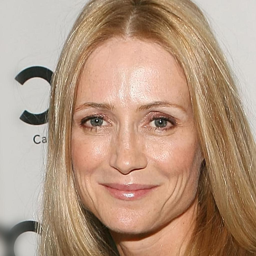

In [27]:
path = f'D://DATASETS/celeba_hq/val/female/{img_name}.jpg'
img = Image.open(path).resize((256,256))
img

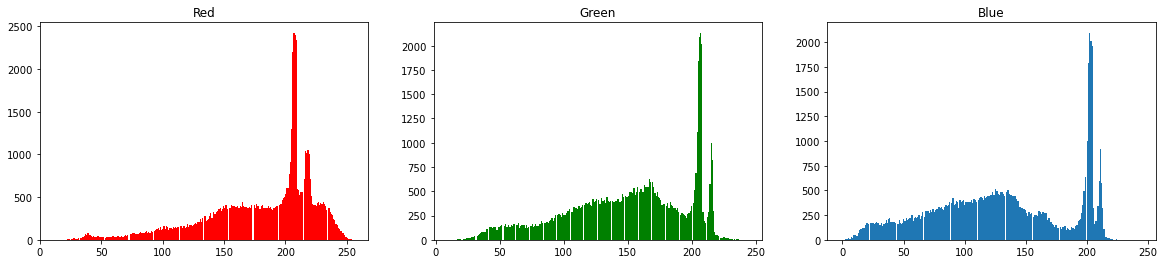

In [28]:
img_hist(img)

## Percentile Stretching

- https://stackoverflow.com/questions/60449340/contrast-enhancement-using-a-percentage-cumulative-count-in-matplolib

In [29]:
img_arr = np.array(img)

R =img_arr[:,:,0]
R.shape

(256, 256)

In [53]:
def contrast_strech_v1(img, low=2, high=98, mode='percentile'):

    min_percent = low   # Low percentile
    max_percent = high  # High percentile

    img_arr = np.array(img)

    R =img_arr[:,:,0]
    G =img_arr[:,:,1]
    B =img_arr[:,:,2]

    Rlow, Rhigh = np.percentile(R.flatten(), (min_percent, max_percent))
    Glow, Ghigh = np.percentile(G.flatten(), (min_percent, max_percent))
    Blow, Bhigh = np.percentile(B.flatten(), (min_percent, max_percent))
    
    # Apply linear "stretch" - lo goes to 0, and hi goes to 1
    new_R = (R.astype(float) - Rlow) / (Rhigh-Rlow) * 255
    new_G = (G.astype(float) - Glow) / (Ghigh-Glow) * 255
    new_B = (B.astype(float) - Blow) / (Bhigh-Blow) * 255

    #Multiply by 255, clamp range to [0, 255] and convert to uint8
    new_R = np.clip(new_R, 0., 255.).astype(np.uint8)
    new_G = np.clip(new_G, 0., 255.).astype(np.uint8)
    new_B = np.clip(new_B, 0., 255.).astype(np.uint8)

    new_img_arr = np.stack((new_R,new_G,new_B)).transpose((1,2,0))

    return Image.fromarray(new_img_arr.astype('uint8'), 'RGB')

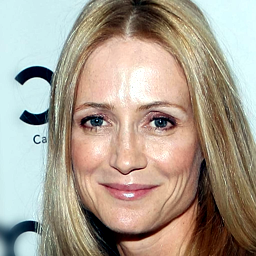

In [60]:
new_img = contrast_strech_v1(img)
new_img

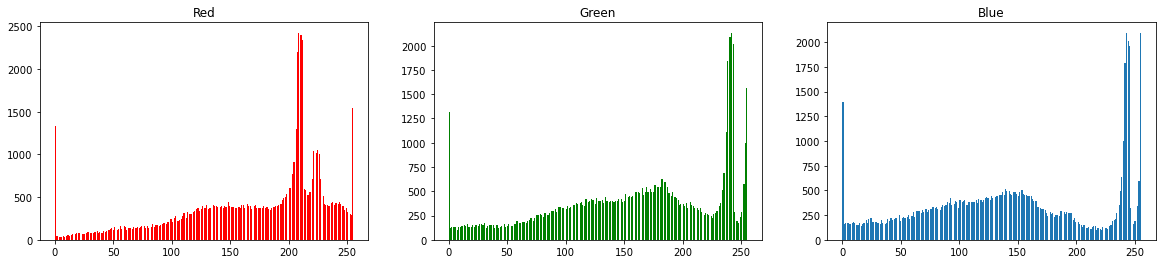

In [61]:
img_hist(new_img)

In [76]:
def contrast_strech_v2(img, low=2, high=98, mode='percentile', strech=True):
    img_arr = np.array(img)
    
    R =img_arr[:,:,0]
    G =img_arr[:,:,1]
    B =img_arr[:,:,2]
    
    if not strech:
        new_img_pil = img
        new_R = R
        new_G = G
        new_B = B
        img_title = 'Original Image'
        
    else:
        min_percent = low   # Low percentile
        max_percent = high  # High percentile


        Rlow, Rhigh = np.percentile(R.flatten(), (min_percent, max_percent))
        Glow, Ghigh = np.percentile(G.flatten(), (min_percent, max_percent))
        Blow, Bhigh = np.percentile(B.flatten(), (min_percent, max_percent))

        # Apply linear "stretch" - lo goes to 0, and hi goes to 1
        new_R = (R.astype(float) - Rlow) / (Rhigh-Rlow) * 255
        new_G = (G.astype(float) - Glow) / (Ghigh-Glow) * 255
        new_B = (B.astype(float) - Blow) / (Bhigh-Blow) * 255

        #Multiply by 255, clamp range to [0, 255] and convert to uint8
        new_R = np.clip(new_R, 0., 255.).astype(np.uint8)
        new_G = np.clip(new_G, 0., 255.).astype(np.uint8)
        new_B = np.clip(new_B, 0., 255.).astype(np.uint8)

        new_img_arr = np.stack((new_R,new_G,new_B)).transpose((1,2,0))

        new_img_pil = Image.fromarray(new_img_arr.astype('uint8'), 'RGB')
        
        img_title = 'New Image'
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))
    
    axes[0].imshow(new_img_pil)
    #print('plotting R...')
    n_1, bins_1, patches_1 = axes[1].hist(new_R.flatten(), bins=255, color='red')
    #print('plotting G...')
    n_2, bins_2, patches_2 = axes[2].hist(new_G.flatten(), bins=255, color='green')
    #print('plotting B...')
    n_3, bins_3, patches_2 = axes[3].hist(new_B.flatten(), bins=255)
    
    axes[0].set_title(f'{img_title}')
    axes[1].set_title('Red')
    axes[2].set_title('Green')
    axes[3].set_title('Blue')
    #print('Done!')
    #fig.tight_layout()
    plt.show()
    

    return new_img_pil

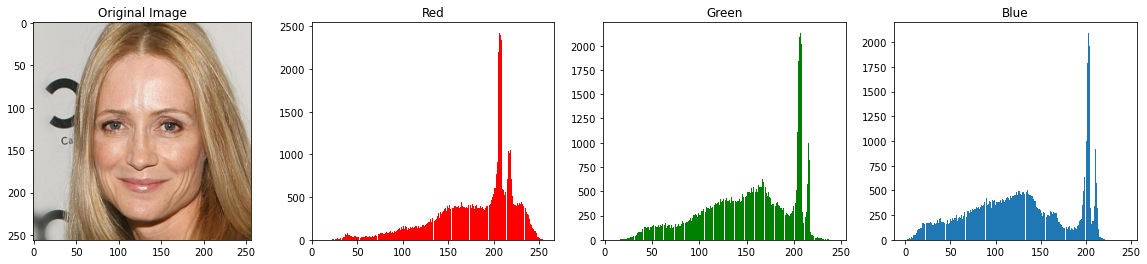

In [78]:
new_img = contrast_strech_v2(img, strech=False)

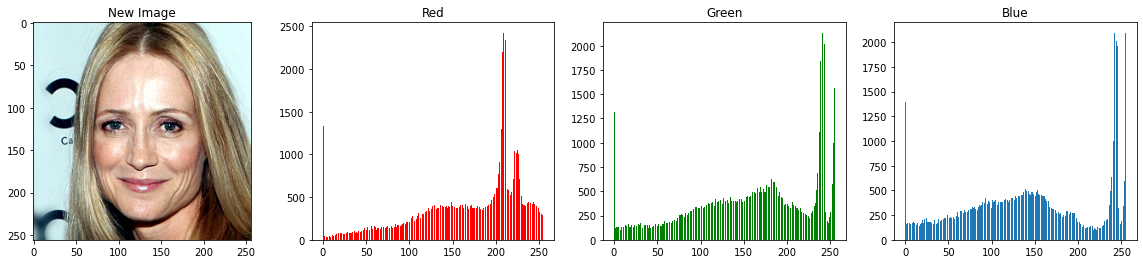

In [77]:
new_img = contrast_strech_v2(img)

# `TEMPERATURE NORMALIZATION - WHITE BALANCING - COLOR BALANCING - kelvin color temperature in python`

### White balancing in C#
### https://adadevelopment.github.io/gdal/white-balance-gdal.html

- The white balance is an algorithm that adjust the color intensity of an image. It is used to improve photos with whitish, orange, bluish or greenish tones. In this article, I describe an white balance algorithm based on GIMP image editor idea. It is an simple and fast algorithm.
- Considering a RGB image in bytes, that is, each pixel varies from 0 to 255, the algorithm is applied on each band separately. The code below should be called for each band in array format. For that, you have to provide the matrix values in sequence, row by row

### https://docs.gimp.org/en/gimp-layer-white-balance.html

- The White Balance command automatically adjusts the colors of the active layer by stretching the Red, Green and Blue channels separately. To do this, it discards pixel colors at each end of the Red, Green and Blue histograms which are used by only 0.05% of the pixels in the image and stretches the remaining range as much as possible. The result is that pixel colors which occur very infrequently at the outer edges of the histograms (perhaps bits of dust, etc.) do not negatively influence the minimum and maximum values used for stretching the histograms, in comparison with Stretch Contrast. Like “Stretch Contrast”, however, there may be hue shifts in the resulting image.

- This command suits images with poor white or black. Since it tends to create pure white (and black), it may be useful e.g. to enhance photographs.

- White Balance operates on layers from RGB images. If the image is Indexed or Grayscale, the menu item is insensitive and grayed out.

In [ ]:
## color balance
#https://en.wikipedia.org/wiki/Color_balance

## white balance

- http://goldsequence.blogspot.com/2019/10/image-white-balancing-with-python.html
    
- https://mattmaulion.medium.com/white-balancing-an-enhancement-technique-in-image-processing-8dd773c69f6
    
- https://gist.github.com/jokkebk/7a0feab274356768b515db6b05f124bf

- https://stackoverflow.com/questions/46390779/automatic-white-balancing-with-grayworld-assumption

- https://gist.github.com/shunsukeaihara/4603234

In [53]:
def gray_world(image):
    """
    White balance image using Gray-world algorithm
    Parameters
    ----------
    image : numpy array
            Image to white balance

    Returns
    -------
    image_wb : numpy array   
               White-balanced image
    """
    image_grayworld = ((image * (access.mean() /  image.mean(axis=(0,1)))).clip(0,255).astype(int))
    # for images having a transparency channel

    if image.shape[2] == 4:
        image_grayworld[:,:,3] = 255
    
    return image_grayworld
#call the function to implement gray world algorithm

In [57]:
def gray_world(nimg):
    nimg = nimg.transpose(2, 0, 1).astype(np.uint32)
    mu_g = np.average(nimg[1])
    nimg[0] = np.minimum(nimg[0]*(mu_g/np.average(nimg[0])),255)
    nimg[2] = np.minimum(nimg[2]*(mu_g/np.average(nimg[2])),255)
    return  nimg.transpose(1, 2, 0).astype(np.uint8)

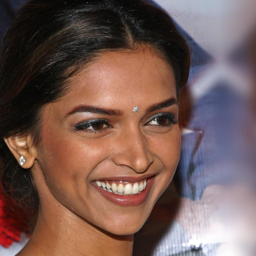

In [58]:
path = 'D://DATASETS/celeba_hq/val/female/000168.jpg'
img = Image.open(path).resize((256,256))
img

In [59]:
import matplotlib.pyplot as plt

In [79]:
def plot(img, size=(4,4), save=False, dpi=80):
    img_arr = np.array(img)
    fig = plt.figure()
    fig.set_size_inches(size)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img_arr, aspect='equal')
    if save:
        plt.savefig(outputname, dpi=dpi)

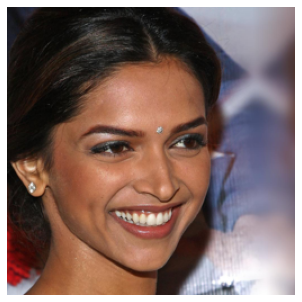

In [80]:
plot(img)

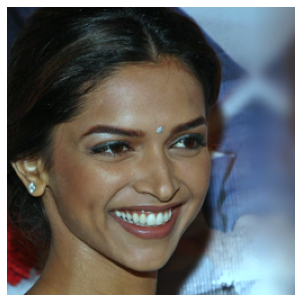

In [81]:
#plt.imshow(gray_world(np.array(img)))
plot(gray_world(np.array(img)))

In [82]:
def stretch_pre(nimg):
    """
    from 'Applicability Of White-Balancing Algorithms to Restoring Faded Colour Slides: An Empirical Evaluation'
    """
    nimg = nimg.transpose(2, 0, 1)
    nimg[0] = np.maximum(nimg[0]-nimg[0].min(),0)
    nimg[1] = np.maximum(nimg[1]-nimg[1].min(),0)
    nimg[2] = np.maximum(nimg[2]-nimg[2].min(),0)
    return nimg.transpose(1, 2, 0)

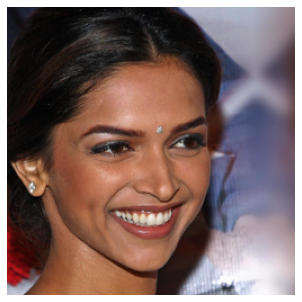

In [83]:
plot(stretch_pre(np.array(img)))

In [84]:
def max_white(nimg):
    if nimg.dtype==np.uint8:
        brightest=float(2**8)
    elif nimg.dtype==np.uint16:
        brightest=float(2**16)
    elif nimg.dtype==np.uint32:
        brightest=float(2**32)
    else:
        brightest==float(2**8)
    nimg = nimg.transpose(2, 0, 1)
    nimg = nimg.astype(np.int32)
    nimg[0] = np.minimum(nimg[0] * (brightest/float(nimg[0].max())),255)
    nimg[1] = np.minimum(nimg[1] * (brightest/float(nimg[1].max())),255)
    nimg[2] = np.minimum(nimg[2] * (brightest/float(nimg[2].max())),255)
    return nimg.transpose(1, 2, 0).astype(np.uint8)

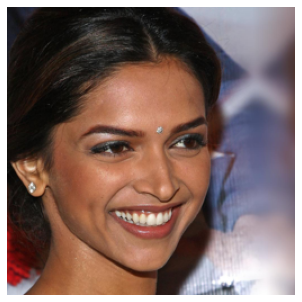

In [85]:
plot(max_white(np.array(img)))

In [86]:
def stretch(nimg):
    return max_white(stretch_pre(nimg))

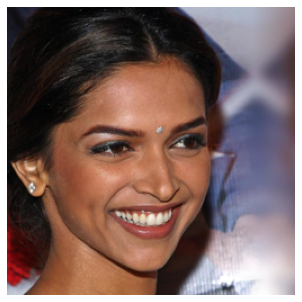

In [87]:
plot(stretch(np.array(img)))

In [88]:
def retinex(nimg):
    nimg = nimg.transpose(2, 0, 1).astype(np.uint32)
    mu_g = nimg[1].max()
    nimg[0] = np.minimum(nimg[0]*(mu_g/float(nimg[0].max())),255)
    nimg[2] = np.minimum(nimg[2]*(mu_g/float(nimg[2].max())),255)
    return nimg.transpose(1, 2, 0).astype(np.uint8)

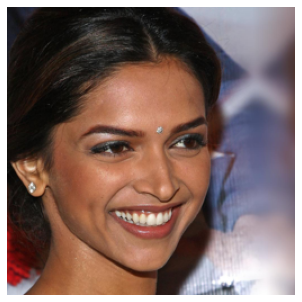

In [89]:
plot(retinex(np.array(img)))

In [90]:
def retinex_adjust(nimg):
    """
    from 'Combining Gray World and Retinex Theory for Automatic White Balance in Digital Photography'
    """
    nimg = nimg.transpose(2, 0, 1).astype(np.uint32)
    sum_r = np.sum(nimg[0])
    sum_r2 = np.sum(nimg[0]**2)
    max_r = nimg[0].max()
    max_r2 = max_r**2
    sum_g = np.sum(nimg[1])
    max_g = nimg[1].max()
    coefficient = np.linalg.solve(np.array([[sum_r2,sum_r],[max_r2,max_r]]),
                                  np.array([sum_g,max_g]))
    nimg[0] = np.minimum((nimg[0]**2)*coefficient[0] + nimg[0]*coefficient[1],255)
    sum_b = np.sum(nimg[1])
    sum_b2 = np.sum(nimg[1]**2)
    max_b = nimg[1].max()
    max_b2 = max_r**2
    coefficient = np.linalg.solve(np.array([[sum_b2,sum_b],[max_b2,max_b]]),
                                             np.array([sum_g,max_g]))
    nimg[1] = np.minimum((nimg[1]**2)*coefficient[0] + nimg[1]*coefficient[1],255)
    return nimg.transpose(1, 2, 0).astype(np.uint8)

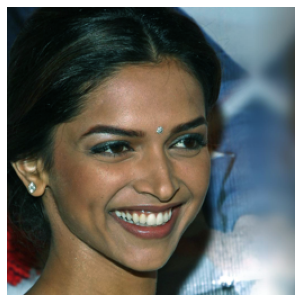

In [91]:
plot(retinex_adjust(np.array(img)))

In [92]:
def retinex_with_adjust(nimg):
    return retinex_adjust(retinex(nimg))

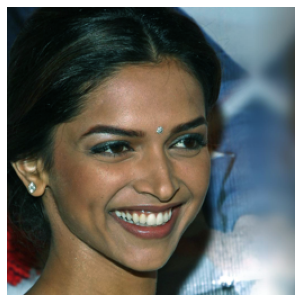

In [93]:
plot(retinex_with_adjust(np.array(img)))

In [94]:
def standard_deviation_weighted_grey_world(nimg,subwidth,subheight):
    """
    This function does not work correctly
    """
    nimg = nimg.astype(np.uint32)
    height, width,ch = nimg.shape
    strides = nimg.itemsize*np.array([width*subheight,subwidth,width,3,1])
    shape = (height/subheight, width/subwidth, subheight, subwidth,3)
    blocks = np.lib.stride_tricks.as_strided(nimg, shape=shape, strides=strides)
    y,x = blocks.shape[:2]
    std_r = np.zeros([y,x],dtype=np.float16)
    std_g = np.zeros([y,x],dtype=np.float16)
    std_b = np.zeros([y,x],dtype=np.float16)
    std_r_sum = 0.0
    std_g_sum = 0.0
    std_b_sum = 0.0
    for i in xrange(y):
        for j in xrange(x):
            subblock = blocks[i,j]
            subb = subblock.transpose(2, 0, 1)
            std_r[i,j]=np.std(subb[0])
            std_g[i,j]=np.std(subb[1])
            std_b[i,j]=np.std(subb[2])
            std_r_sum += std_r[i,j]
            std_g_sum += std_g[i,j]
            std_b_sum += std_b[i,j]
    sdwa_r = 0.0
    sdwa_g = 0.0
    sdwa_b = 0.0
    for i in xrange(y):
        for j in xrange(x):
            subblock = blocks[i,j]
            subb = subblock.transpose(2, 0, 1)
            mean_r=np.mean(subb[0])
            mean_g=np.mean(subb[1])
            mean_b=np.mean(subb[2])
            sdwa_r += (std_r[i,j]/std_r_sum)*mean_r
            sdwa_g += (std_g[i,j]/std_g_sum)*mean_g
            sdwa_b += (std_b[i,j]/std_b_sum)*mean_b
    sdwa_avg = (sdwa_r+sdwa_g+sdwa_b)/3
    gain_r = sdwa_avg/sdwa_r
    gain_g = sdwa_avg/sdwa_g
    gain_b = sdwa_avg/sdwa_b
    nimg = nimg.transpose(2, 0, 1)
    nimg[0] = np.minimum(nimg[0]*gain_r,255)
    nimg[1] = np.minimum(nimg[1]*gain_g,255)
    nimg[2] = np.minimum(nimg[2]*gain_b,255)
    return nimg.transpose(1, 2, 0).astype(np.uint8)

In [79]:
#plot(standard_deviation_weighted_grey_world(np.array(img),subwidth=256,subheight=256))

In [25]:
#000168
#000431
img_name = '000431'

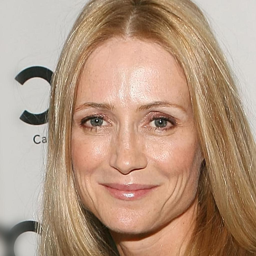

In [80]:
path = f'D://DATASETS/celeba_hq/val/female/{img_name}.jpg'
img = Image.open(path).resize((256,256))
img

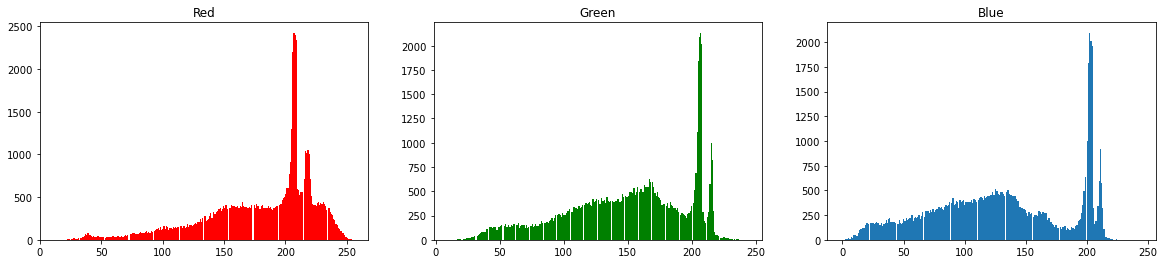

In [81]:
img_hist(img)

In [29]:
img_arr = np.array(img)

R =img_arr[:,:,0]
R.shape

(256, 256)

In [84]:
import cv2

In [95]:
# white balance for every channel independently
def white_balance_gimp_channelwise(channel, perc = 0.05):
    min_, max_ = (np.percentile(channel, perc), np.percentile(channel,100.0-perc))
    channel = np.uint8(np.clip((channel-min_)*255.0/(max_-min_), 0, 255))
    return channel

def white_balance_gimp(img_array, perc = 0.05):
    return np.dstack([white_balance_gimp_channelwise(img_array[:,:,channel], 0.05) for channel in range(3)] )

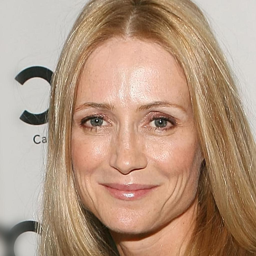

In [99]:
image = Image.open(path) # load color
image.resize((256,256))

In [110]:
def np_to_pil(array, resize=False):
    img = Image.fromarray(np.uint8(img_white_balanced)).convert('RGB')
    if resize:
        return img.resize((256,256))
    return img

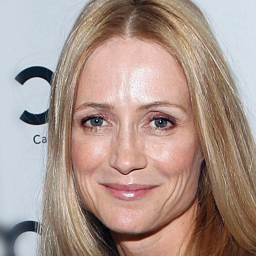

In [111]:
img_white_balanced  = white_balance_gimp(np.array(image), perc = 0.05)
np_to_pil(img_white_balanced, resize=True)

In [101]:
import tensorflow as tf

In [113]:
class WhiteBalanceTool():
    
    def __init__(self, brighness_mode=0):
        """
        Temp tool to estimate and change RGB image temperature
        
        Methods:
        --------
        1. `get_temperature`: estimates the current temperature of an image:
            parameters:
                - img: tf.tensor([h,w,3], tf.float32) --> Input Image
            returns:
                - temp_estimate: tf.tensor([1], tf.int32) --> Temperature Estimation in Kelvin
        
        2. `convert_temperature`: to change the temperature of an image
            parameters:
                - img: tf.tensor([h,w,3], tf.float32) --> Input Image
            returns:
                - temp_image: tf.tensor([h,w,3], tf.float32) --> Input image at *new* temperature
                
        Theory:
        -------
        A. Temperature Estimation is done by:
            1. Find the white-point of the input image (brightest pixel)
            2. Find the closest (Sum MAE) RGB value in the temperature table
            3. Take temperature of closest RGB to white-point
            
        B. Temperature conversion is done by:
            1. Find the white-point of the input image (brightest pixel)
            2. Look-up RGB value of requested temperature
            3. Scale this RGB value by the white-point RGB values
            4. Apply this weight to the input img RGB channels
        """
        if brighness_mode==0:
            self.get_brightness_image = self.get_brightness_image_v1
        elif brighness_mode==1:
            self.get_brightness_image = self.get_brightness_image_v2
        else:
            self.get_brightness_image = self.get_brightness_image_v3

    #########################################
    ###  A. ESTIMATING IMAGE TEMPERATURE  ###
    #########################################
    

    @tf.function
    def get_brightness_image_v1(self, img):
        """Returns the brightness of each pixel in the given image
        https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color
        """
        # img is [h,w,3] tensor
        
        # To compute brightness of an image do a weighted average across channels
        brightness_image = tf.convert_to_tensor([0.2126*img[:,:,0] + 0.7152*img[:,:,1] + 0.0722*img[:,:,2]], dtype=tf.float32)
        # brightness_image will be a [1,h,w] tensor
    
        return brightness_image 
    
    
    @tf.function
    def get_brightness_image_v2(self, img):
        """Returns the brightness of each pixel in the given image
        https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color
        """
        #
        # img is [h,w,3] tensor
        
        # To compute brightness of an image do a weighted average across channels
        brightness_image = tf.convert_to_tensor([0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]], dtype=tf.float32)
        # brightness_image will be a [1,h,w] tensor
    
        return brightness_image 
    
    
    @tf.function
    def get_brightness_image_v3(self, img):
        """Returns the brightness of each pixel in the given image
        https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color
        """
        # img is [h,w,3] tensor
        
        # To compute brightness of an image do a weighted average across channels
        brightness_image = tf.convert_to_tensor([0.299*img[:,:,0]**2 + 0.587*img[:,:,1]**2 + 0.114*img[:,:,2]**2], dtype=tf.float32)
        # brightness_image will be a [1,h,w] tensor
    
        return brightness_image 
    
    
    @tf.function
    def get_white_point(self, img):
        """Returns white point and its coordinates"""
        # img is a [h,w,3] tensor 
        brightness_image = self.get_brightness_image(img) 
        #brightness_image is [1,h,w] tensor
        
        # get the maximum pixel (from all channels collectively)
        # brightness_image[0] is [h,w] tensor
        brightness_argmax = tf.argmax(tf.reshape(brightness_image[0], [-1]), axis=None) #brightness_argmax is () location
        
        brightness_argmax = brightness_argmax // brightness_image[0].shape[1], \
                            brightness_argmax % brightness_image[0].shape[1],
        # brightness_argmax is tuple of height and width of argmax
        
        # white_point = [y,x,:]  3-D array of (R,G,B) channel values of highest brightness, where
        # brightness(y,x) = 0.2126*img[y,x,0] + 0.7152*img[y,x,1] + 0.0722*img[y,x,2] 
        white_point = tf.gather_nd(img, brightness_argmax)
        
        return white_point, brightness_argmax
        

    #########################################
    ###  B. CONVERTING IMAGE TEMPERATURE  ###
    #########################################
    
    @tf.function
    def convert_temperature(self, img):
        """After estimate white point of img as the pixel with maximum brightness cast the image to another temp and return"""
        # img is [h,w,3] tensor
        
        #Ensure RGB or RGBA float32 tensor - alpha channel is dropped
        assert ((tf.is_tensor(img)) & (len(img.shape) ==3) & (img.shape[-1] in [3,4])), "input should be 4 channel RGB float32 tensor"
        
        img = tf.cast(img[:, :, :3], dtype=tf.float32)
        
        #Get brightess pixel location and its RGB value
        white_point, white_point_idx = self.get_white_point(img) # e.g. white_point = [248, 255, 234]
        
        # how much to scale the values of R, G and B channels
        matrix = tf.convert_to_tensor([
            [255.0/white_point[0], 0.0, 0.0],
            [0.0,255.0/white_point[1], 0.0],
            [0.0, 0.0, 255.0/white_point[2]],
        ])
        
        img_out = tf.matmul(img, matrix)
        
        return tf.cast(tf.clip_by_value(img_out, 0.0, 255.0), tf.uint8)

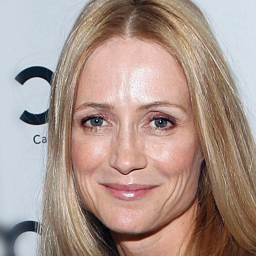

In [116]:
WBtool = WhiteBalanceTool(brighness_mode=0)

img_tensor = tf.convert_to_tensor(np.array(image))
img_tensor_WB = WBtool.convert_temperature(img_tensor)
img_wb_1 = np_to_pil(img_tensor_WB.numpy(), resize=True)
img_wb_1

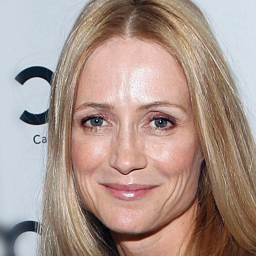

In [117]:
WBtool = WhiteBalanceTool(brighness_mode=1)

img_tensor = tf.convert_to_tensor(np.array(image))
img_tensor_WB = WBtool.convert_temperature(img_tensor)
img_wb_2 = np_to_pil(img_tensor_WB.numpy(), resize=True)
img_wb_2

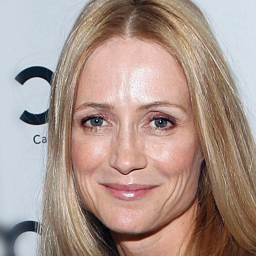

In [118]:
WBtool = WhiteBalanceTool(brighness_mode=2)

img_tensor = tf.convert_to_tensor(np.array(image))
img_tensor_WB = WBtool.convert_temperature(img_tensor)
img_wb_3 = np_to_pil(img_tensor_WB.numpy(), resize=True)
img_wb_3

In [122]:
np.abs(np.array(img_wb_1) - np.array(img_wb_2)).sum()

0

In [123]:
np.abs(np.array(img_wb_1) - np.array(img_wb_3)).sum()

0

In [124]:
np.abs(np.array(img_wb_2) - np.array(img_wb_3)).sum()

0